# DALLAS POLICE ARRESTS ANALYSIS

### The Structure of the Data
##### 1. The data is not well organized
##### 2. It has no standardized coding systms
##### 3. Names are misspelled, wrongly or differently represented, such as cities, premises
##### 3. It required several hours of restructuring and cleaning
#### General Obsevation on the Exploratory Data Analysis
##### 1. The Police arrest shows a pridictable trend of increasing arrest starting from 9:00pm till midnight . Arrest is low or non-exostent betwwenn 5:00am to 3:00pm.
##### 2. Drug related arrests are fewer compared to the overall arrest report. However, the drug related arrest can be considered significat 
##### 3. The arrest report also show that a high percentage of the arrestees are African Americans
##### 4. The data shows, though small in percentage, that a significant number of arrestees are foreign born individuals (the majority being mexican origin)
##### 5. Zip codes 75243, 75216, and 75217  are the sources of highest numbers of arrestees
##### 6. In terms of week days, highest numbers of arrests are made on Saturdays, followed by Fridays and Thursdays.
##### 7. Large number of the arrestees  are homeless

## DATA INGESTION

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# http://www.lfd.uci.edu/~gohlke/pythonlibs/ 
# Download and install basemap 1.0.8_cp27_none_win_amd64.whl
# pip install basemap 1.0.8_cp27_none_win_amd64.whl
 
#from mpl_toolkits.basemap import basemap

In [2]:
Dallas_cols = ['ArrestNumID', 'ArLZip', 'ArLCity', 'ArState', 'ArLAddress', 'ArArrestDate',
               'ArArrestTime', 'ArADOW','ArPremises', 'ArWeapon', 'BirthPlace', 'Age', 'Race',
               'Sex', 'HAddress', 'HCity', 'HState', 'DrugRelated', 'DrugType']

In [7]:
Dallas_Raw = pd.read_csv('C://Users/Berihun/Desktop/divergence/Project/data/Dallas_Arrest.csv',
                         sep = ',', low_memory=False)
Dallas_Raw.head()#C:\Users\Berihun\Desktop\divergence\Project\data
Dallas_Raw.columns

Index(['IncidentNum', 'Involvement', 'ArrestYr', 'ArrestNum', 'ArBkNum',
       'ArCaseNum', 'ArrestNumID', 'ArBkDate', 'ArBkNo', 'ArLBlock', 'ArLDir',
       'ArLStreet', 'ArLApt', 'ArLZip', 'ArLCity', 'ArState', 'ArLRA',
       'ArLBeat', 'ArLAddress', 'ArArrestDate', 'ArArrestTime', 'ArADOW',
       'ArPremises', 'ArOfcr1', 'ArOfcr2', 'Transport1', 'Transport2',
       'Search1', 'Search2', 'ArHow', 'ArWeapon', 'ArOSR', 'ArResisted',
       'ArArmed', 'ArCurrLoc', 'ArCond', 'ArMedFlag', 'ArMedLoc', 'ArOpComm',
       'ArServYr', 'ArServNo', 'ServiceNum', 'ArNarrKey', 'Name', 'NickName',
       'AliasName', 'BirthPlace', 'Age', 'AgeAtArrestTime', 'Height', 'Weight',
       'Hair', 'Eyes', 'Race', 'Sex', 'DLType', 'HBlock', 'HDir', 'HStreet',
       'HAddress', 'HApt', 'HZIP', 'HCity', 'HState', 'HRA', 'HBeat', 'Tatoo',
       'TatooComment', 'Occupation', 'JobSchStatus', 'Employer', 'Drug',
       'DrugRelated', 'DrugType', 'ClothingWorn', 'Expunged', 'UpZDate',
       'GeoLocation']

In [8]:
Dallas = Dallas_Raw[Dallas_cols]
Dallas.columns

Index(['ArrestNumID', 'ArLZip', 'ArLCity', 'ArState', 'ArLAddress',
       'ArArrestDate', 'ArArrestTime', 'ArADOW', 'ArPremises', 'ArWeapon',
       'BirthPlace', 'Age', 'Race', 'Sex', 'HAddress', 'HCity', 'HState',
       'DrugRelated', 'DrugType'],
      dtype='object')

In [9]:
Dallas.loc[0:15, 'ArrestNumID':'DrugType'][1:12]

,ArrestNumID,ArLZip,ArLCity,ArState,ArLAddress,ArArrestDate,ArArrestTime,ArADOW,ArPremises,ArWeapon,BirthPlace,Age,Race,Sex,HAddress,HCity,HState,DrugRelated,DrugType
1,0023946-2014,75224.0,DALLAS,TX,2323 W ILLINOIS AVE,6/1/2014 0:00,15:38,Sun,Convenience Store,Knife - Other,DALLAS,46,Black,Male,1806 BOYD,DALLAS,TX,No,NaN
2,0025129-2014,75225.0,DALLAS,TX,8687 N CENTRAL,6/10/2014 0:00,12:00,Tue,Retail Store,Other,NaN,26,Black,Female,2900 DILIDO APT 1315,DALLAS,TX,No,NaN
3,0025174-2014,75225.0,DALLAS,TX,8687 N CENTRAL EXPY,6/10/2014 0:00,15:30,Tue,Retail Store,None,OHIO,25,Black,Female,9050 MARKVILLE DR APT 412,DALLAS,TX,No,NaN
4,0025176-2014,75225.0,DALLAS,TX,8687 N CENTRAL EXPY,6/10/2014 0:00,15:30,Tue,Retail Store,None,DALLAS,32,Black,Female,1720 JOHNWEST ST,DALLAS,TX,No,NaN
5,0029547-2014,75211.0,DALLAS,TX,2610 FORT WORTH AVE,7/8/2014 0:00,17:30,Tue,Retail Store,None,DALLAS,53,Black,Male,3800 S TYLER ST APT 141,DALLAS,TX,No,NaN
6,0024467-2014,75211.0,DALLAS,TX,1521 N COCKRELL HILL RD,6/5/2014 0:00,13:00,Thu,Retail Store,None,NaN,24,White,Male,518 SE 10TH ST,GRAND PRAIRIE,TX,No,NaN
7,0024490-2014,75220.0,DALLAS,TX,9410 WEBB CHAPEL RD,6/5/2014 0:00,14:45,Thu,Retail Store,Hands/Feet,MANAGUA,30,Latin / Hispanic,Female,3339 LOMBARDY LN APT 805,DALLAS,TX,Uknown,NaN
8,0025104-2014,75231.0,DALLAS,TX,8442 PARK LN,6/10/2014 0:00,9:15,Tue,Convenience Store,None,DALLAS,25,Black,Male,6003 RIDGECREST APT 301,DALLAS,TX,No,NaN
9,0026996-2014,75218.0,DALLAS,TX,9700 NORTHWEST HWY,6/22/2014 0:00,8:00,Sun,"Highway, Street, Alley ETC",None,NaN,28,Latin / Hispanic,Male,6526 RIDGECREST APT 201,DALLAS,TX,No,NaN
10,0027009-2014,75232.0,DALLAS,TX,200 SHORT BLVD,6/22/2014 0:00,13:26,Sun,Retail Store,None,DALLAS,28,Black,Female,141 BECKLEY HILLS DR,DALLAS,TX,No,NaN


## PART 2: PRE-PROCESSING

### CONVERT ADDRESS TO (LATITUDE, LONGITUDE)

In [11]:
from geopy.geocoders import Nominatim

def display_coordinates(address):
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    if location != None:
        print(location.address)
        print((location.latitude, location.longitude))
        print(location.raw)

In [12]:
from geopy.geocoders import Nominatim

def lat_long(x):
    coordinates = (0, 0)
    
    try:
        geolocator = Nominatim()
        location = geolocator.geocode(x)
        if location != None:        
            coordinates = (location.latitude, location.longitude)
    except:
        coordinates = (0, 0)
    return coordinates

In [13]:
import numpy as np

def combine_address(cols):
    address = None
    if cols[3] != None:
        address = "{0}, {1}, {2} {3}".format(cols[0], cols[1], cols[2], cols[3])
    return address

In [14]:
# Cleanup Zip codes
Dallas.ArLZip.fillna(99999.0, inplace=True)
Dallas.loc[:, 'ArLZip'] = Dallas.ArLZip.astype(int)

C:\Users\Berihun\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Berihun\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
display_coordinates('2323 W ILLINOIS AVE, DALLAS, TX 75224')

C:\Users\Berihun\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


2323, West Illinois Avenue, Dallas, Dallas County, Texas, 75224, USA
(32.72101385, -96.8565023610887)
{'place_id': '176752946', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': '467217045', 'boundingbox': ['32.7207814', '32.7212093', '-96.8566755', '-96.8562694'], 'lat': '32.72101385', 'lon': '-96.8565023610887', 'display_name': '2323, West Illinois Avenue, Dallas, Dallas County, Texas, 75224, USA', 'class': 'building', 'type': 'yes', 'importance': 0.621}


In [ ]:
#NewCols = Dallas['ArLAddress', 'ArLCity', 'ArState', 'ArLZip']
#Dallas.loc[:, 'combined_address'] = Dallas[NewCols].apply(combine_address, axis=1)

In [16]:
Dallas.loc[:, 'combined_address'] = Dallas[['ArLAddress', 'ArLCity', 'ArState', 'ArLZip']].apply(combine_address, axis=1)

C:\Users\Berihun\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Berihun\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
Dallas.loc[:, 'lat_long'] = Dallas.combined_address.apply(lat_long)

C:\Users\Berihun\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning
C:\Users\Berihun\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Berihun\Anaconda3\lib\site-packages\pandas\cor

In [20]:
Dallas.head()

,ArrestNumID,ArLZip,ArLCity,ArState,ArLAddress,ArArrestDate,ArArrestTime,ArADOW,ArPremises,ArWeapon,...,Age,Race,Sex,HAddress,HCity,HState,DrugRelated,DrugType,combined_address,lat_long
0,0023915-2014,75211,Dallas,TX,1521 N. COCKRELL HILL,6/1/2014 0:00,9:04,Sun,Retail Store,None,...,35,White,Female,3801 MT RANIER,DALLAS,TX,No,NaN,"1521 N. COCKRELL HILL, Dallas, TX 75211","(0, 0)"
1,0023946-2014,75224,DALLAS,TX,2323 W ILLINOIS AVE,6/1/2014 0:00,15:38,Sun,Convenience Store,Knife - Other,...,46,Black,Male,1806 BOYD,DALLAS,TX,No,NaN,"2323 W ILLINOIS AVE, DALLAS, TX 75224","(32.72101385, -96.8565023610887)"
2,0025129-2014,75225,DALLAS,TX,8687 N CENTRAL,6/10/2014 0:00,12:00,Tue,Retail Store,Other,...,26,Black,Female,2900 DILIDO APT 1315,DALLAS,TX,No,NaN,"8687 N CENTRAL, DALLAS, TX 75225","(0, 0)"
3,0025174-2014,75225,DALLAS,TX,8687 N CENTRAL EXPY,6/10/2014 0:00,15:30,Tue,Retail Store,None,...,25,Black,Female,9050 MARKVILLE DR APT 412,DALLAS,TX,No,NaN,"8687 N CENTRAL EXPY, DALLAS, TX 75225","(0, 0)"
4,0025176-2014,75225,DALLAS,TX,8687 N CENTRAL EXPY,6/10/2014 0:00,15:30,Tue,Retail Store,None,...,32,Black,Female,1720 JOHNWEST ST,DALLAS,TX,No,NaN,"8687 N CENTRAL EXPY, DALLAS, TX 75225","(32.86843675, -96.7736526930291)"


In [22]:
  #Save the new data to a separate CSV file
Dallas.to_csv('Transformed1_dallas_arrests.csv')
#Dallas.to_csv('C://Users/Berihun/Desktop/divergence/Project/dallas_arrests,csv')

# LOAD REVERSE GEO-CODED DATASET

In [23]:
dallas = pd.read_csv('Transformed1_dallas_arrests.csv')
del dallas['Unnamed: 0']

In [24]:
dallas[['latitude', 'longitude']] = dallas['lat_long'].str[1:-1].str.split(',').apply(pd.Series).astype(float)

In [25]:
dallas.head()

,ArrestNumID,ArLZip,ArLCity,ArState,ArLAddress,ArArrestDate,ArArrestTime,ArADOW,ArPremises,ArWeapon,...,Sex,HAddress,HCity,HState,DrugRelated,DrugType,combined_address,lat_long,latitude,longitude
0,0023915-2014,75211,Dallas,TX,1521 N. COCKRELL HILL,6/1/2014 0:00,9:04,Sun,Retail Store,None,...,Female,3801 MT RANIER,DALLAS,TX,No,NaN,"1521 N. COCKRELL HILL, Dallas, TX 75211","(0, 0)",0.000000,0.000000
1,0023946-2014,75224,DALLAS,TX,2323 W ILLINOIS AVE,6/1/2014 0:00,15:38,Sun,Convenience Store,Knife - Other,...,Male,1806 BOYD,DALLAS,TX,No,NaN,"2323 W ILLINOIS AVE, DALLAS, TX 75224","(32.72101385, -96.8565023610887)",32.721014,-96.856502
2,0025129-2014,75225,DALLAS,TX,8687 N CENTRAL,6/10/2014 0:00,12:00,Tue,Retail Store,Other,...,Female,2900 DILIDO APT 1315,DALLAS,TX,No,NaN,"8687 N CENTRAL, DALLAS, TX 75225","(0, 0)",0.000000,0.000000
3,0025174-2014,75225,DALLAS,TX,8687 N CENTRAL EXPY,6/10/2014 0:00,15:30,Tue,Retail Store,None,...,Female,9050 MARKVILLE DR APT 412,DALLAS,TX,No,NaN,"8687 N CENTRAL EXPY, DALLAS, TX 75225","(0, 0)",0.000000,0.000000
4,0025176-2014,75225,DALLAS,TX,8687 N CENTRAL EXPY,6/10/2014 0:00,15:30,Tue,Retail Store,None,...,Female,1720 JOHNWEST ST,DALLAS,TX,No,NaN,"8687 N CENTRAL EXPY, DALLAS, TX 75225","(32.86843675, -96.7736526930291)",32.868437,-96.773653


### IMPUTATION

In [26]:
dallas.isnull().sum()

ArrestNumID             0
ArLZip                  0
ArLCity                26
ArState                53
ArLAddress             25
ArArrestDate            1
ArArrestTime            0
ArADOW                  0
ArPremises           4709
ArWeapon                1
BirthPlace           8507
Age                     0
Race                    0
Sex                   219
HAddress              765
HCity                 818
HState               1628
DrugRelated          4680
DrugType            18167
combined_address        0
lat_long                0
latitude                0
longitude               0
dtype: int64

In [20]:
# most people arrested are HOMELESS
dallas.HAddress.value_counts()

# there are 14741 unique addresses
np.size(dallas.HAddress.unique())

# there are total of 19617 rows
dallas.shape

dallas.HAddress.isnull().sum()

# print the city, state, and zip of Homeless

dallas[dallas.HAddress == 'HOMELESS'].HCity.value_counts()

DALLAS      567
HOMELESS      4
HOUSTON       3
DALALS        2
DALLLAS       2
UNKNOWN       2
DAALLAS       1
DALLA         1
FT WORTH      1
IRVING        1
Name: HCity, dtype: int64

In [27]:
## Clean-up the City Names. Assign DALLAS where name is like DALLAS
dallas.ix[dallas.HCity.isin(['DALALS', 'DALLLAS', 'UNKNOWN', 'DAALLAS', 'DALLA' ]), 'HCity'] = 'DALLAS'

## Majority of Homeless live in DALLAS. Assign DALLAS where HAddress is HOMELESS 
dallas.ix[dallas.HAddress == 'HOMELESS', 'HCity'] = 'DALLAS'

## Assume most of the arrested live in TX
dallas.HState.fillna('TX', inplace=True)

## Assume most of the arrested live in DALLAS
dallas.HCity.fillna('DALLAS', inplace=True)

## Assume most of them are HOMELESS when no address is assigned
dallas.HAddress.fillna('HOMELESS', inplace=True)

C:\Users\Berihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [28]:
## Convert Uknown DrugRelated cases to No drugs
dallas.DrugRelated.replace('Uknown', 'No', inplace=True)

## Assume rest of the missing values for DrugRelated is also No
dallas.DrugRelated.fillna('No', inplace=True)

In [29]:
dallas.DrugRelated.value_counts()

No     18219
Yes     1398
Name: DrugRelated, dtype: int64

In [30]:
# Consolidate DrugType
dallas.ix[dallas.DrugType.isin(['Processed Marijuana', 'Cultivated Marijuana']), 'DrugType'] = 'Marijuana'
dallas.ix[dallas.DrugType.isin(['Crack Cocaine', 'Powder Cocaine']), 'DrugType'] = 'Cocaine'

In [32]:
# less than 10% of the Arrested cases are Drug Related
print(dallas.DrugType.notnull().sum())
dallas[(dallas.DrugRelated == 'Yes') & (dallas.DrugType.notnull())].DrugType.value_counts()

1450


Marijuana                       508
Cocaine                         283
Methamphetamine                 223
Other Prescription Drugs        128
Other Non-Prescription Drugs    125
Heroin                          105
Hydrocodone                      14
Ketamine                          4
Oxycodone                         4
Ecstacy                           3
GHB                               1
Name: DrugType, dtype: int64

In [33]:
# Assign DrugType = Clean as a value for those arrests that are non-drug related
dallas.ix[dallas.DrugType.isnull(), 'DrugType'] = 'Clean'
dallas.DrugType.value_counts(dropna=False)

Clean                           18167
Marijuana                         522
Cocaine                           294
Methamphetamine                   226
Other Non-Prescription Drugs      136
Other Prescription Drugs          132
Heroin                            109
Hydrocodone                        14
Ecstacy                             7
Ketamine                            5
Oxycodone                           4
GHB                                 1
Name: DrugType, dtype: int64

### MISSING VALUE PROCESS FOR Sex

In [34]:
dict(dallas.Sex.value_counts())

{'10-May': 1, 'Female ': 5136, 'Male ': 14260, 'TEST ': 1}

In [35]:
## There are two values that are 10-May, and TEST. Not sure what they are... drop the rows
drop_rows = dallas[dallas.Sex.isin(['10-May', 'TEST '])].index
dallas.drop(drop_rows, inplace=True)

In [36]:
dallas.shape

(19615, 23)

In [43]:
# Assign a percent of Male and Female to missing Sex vales
sex_dict = dict(dallas.Sex.value_counts())
male_percent = float(sex_dict['Male ']) / float(sex_dict['Male '] + sex_dict['Female '])
female_percent = float(sex_dict['Female ']) / float(sex_dict['Male '] + sex_dict['Female '])
print(male_percent, female_percent)
#print('The gross pay is', format(gross_pay, '.2f'))

dallas_notnull = dallas[dallas.Sex.notnull()]
dallas_isnull = dallas[dallas.Sex.isnull()]

print(dallas_notnull.shape[0])
print(dallas_isnull.shape[0])

0.7352031346669416 0.26479686533305835
19396
219


In [44]:
# randomly sample dallas_isnull
import numpy as np
mask = np.random.rand(len(dallas_isnull)) < male_percent # create a Series of booleans
male_null = dallas_isnull[mask]                        # will contain around 66% of the rows
female_null = dallas_isnull[~mask]                        # will contain the remaining rows

In [46]:
print(male_null.shape[0], female_null.shape[0])
male_null.ix[:, 'Sex'] = 'Male '
female_null.ix[:, 'Sex'] = 'Female '
nonull_sex = pd.concat([male_null, female_null])
nonull_sex.Sex.value_counts()

168 51


C:\Users\Berihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Berihun\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Berihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel p

Male       168
Female      51
Name: Sex, dtype: int64

In [47]:
# rebuild the original frame
dallas = pd.concat([dallas_notnull, nonull_sex])

### CONSOLIDATE Arrest Premises

In [48]:
dallas.ix[dallas.ArPremises.isin(['Parking Lot (All Others)', 
                               'Parking Lot (Apartment)', 
                               'Parking Lot (Park)', 
                               'Apartment Parking Lot',
                               'Condominium/Townhome Parking']), 'ArPremises'] = 'Parking Lot'

C:\Users\Berihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [49]:
dallas.ix[dallas.ArPremises.isin(['Single Family Residence - Occupied', 
                               'Apartment Complex/Building', 
                               'Apartment Residence', 
                               'Single Family Residence - Vacant',
                               'Condominium/Townhome Residence',
                               'Condominium/Townhome Building']), 'ArPremises'] = 'Residence'

In [50]:
dallas.ix[dallas.ArPremises.isin(['Airport - All Others', 
                               'Airport - Love Field']), 'ArPremises'] = 'Airport'

In [51]:
dallas.ix[dallas.ArPremises.isin(['Business Office', 
                                  'Medical Facility', 
                                  'Government Facility', 
                                  'Financial Institution',
                                  'Religious Institution',
                                  'Industrial/Manufacturing',
                                  'Commercial Property Occupied/Vacant', 
                                 'Convenience Store',
                                 'Gas or Service Station',
                                 'Restaurant/Food Service/TABC Location',
                                 'Bar/NightClub/DanceHall ETC.',
                                 'Storage Facility',
                                 'School/Daycare']), 'ArPremises'] = 'Business Facility'

In [52]:
dallas.ix[dallas.ArPremises.isin(['City Park/Rec/Tennis/Golf/Trail', 
                               'Entertainment/Sports Venue']), 'ArPremises'] = 'Recreation'

In [53]:
dallas.ArPremises.fillna('Other', inplace=True)

In [54]:
dallas.ArPremises.value_counts(dropna=False)

Other                          5415
Residence                      3513
Highway, Street, Alley ETC     2913
Retail Store                   2583
Business Facility              2248
Parking Lot                    1796
Outdoor Area Public/Private     714
Motor Vehicle                   267
Airport                          73
Recreation                       71
Personal Services                22
Name: ArPremises, dtype: int64

In [55]:
dallas.isnull().sum()

ArrestNumID            0
ArLZip                 0
ArLCity               26
ArState               53
ArLAddress            25
ArArrestDate           0
ArArrestTime           0
ArADOW                 0
ArPremises             0
ArWeapon               1
BirthPlace          8506
Age                    0
Race                   0
Sex                    0
HAddress               0
HCity                  0
HState                 0
DrugRelated            0
DrugType               0
combined_address       0
lat_long               0
latitude               0
longitude              0
dtype: int64

### CONSOLIDATE & IMPUTE BirthPlace

In [56]:
dallas.shape[0]

19615

In [57]:
# 63% of the BirthPlace are from Texas
float(6905) / float(10909)

0.6329636080300669

In [59]:
dallas.BirthPlace.value_counts().head()

DALLAS        3049
DALLAS, TX    1122
MEXICO        1046
DALLAS TX      490
DALLAS,TX      302
Name: BirthPlace, dtype: int64

In [60]:
# Consolidate, BirthPlace
#dallas.ix[dallas.BirthPlace.isin(['DALLAS', 'DALLAS TX', 'DALLAS, TEXAS', 'DALLAS TEXAS', 'TX', '']), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('DALLAS', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('DALLS', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('TEXAS', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('EL PASO', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('SAN ANTONIO', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('HOUSTON', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('FORT WORTH', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('FT WORTH', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('TX', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('IRVING', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('MCKINNEY', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('MESQUITE', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('LUBBOCK', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('CORPUS CHRISTI', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('CORPUS CRISTI', regex=True), 'BirthPlace'] = 'TEXAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', TX', regex=True), 'BirthPlace'] = 'TEXAS'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('NEW YORK', regex=True), 'BirthPlace'] = 'NEW YORK'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('NY', regex=True), 'BirthPlace'] = 'NEW YORK'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('LA', regex=True), 'BirthPlace'] = 'LOUISIANA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('NEW ORLEANS', regex=True), 'BirthPlace'] = 'LOUISIANA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('LOUISIANA', regex=True), 'BirthPlace'] = 'LOUISIANA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('SHREVEPORT', regex=True), 'BirthPlace'] = 'LOUISIANA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('LOUISANA', regex=True), 'BirthPlace'] = 'LOUISIANA'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('CHICAGO'), 'BirthPlace'] = 'ILLINOIS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', IL'), 'BirthPlace'] = 'ILLINOIS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(',IL'), 'BirthPlace'] = 'ILLINOIS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('ILLINOIS'), 'BirthPlace'] = 'ILLINOIS'
        

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('LOS ANGELES', regex=True), 'BirthPlace'] = 'CALIFORNIA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('RIVERSIDE, CA', regex=True), 'BirthPlace'] = 'CALIFORNIA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('CALIFORNIA', regex=True), 'BirthPlace'] = 'CALIFORNIA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('SAN DIEGO', regex=True), 'BirthPlace'] = 'CALIFORNIA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', CA', regex=True), 'BirthPlace'] = 'CALIFORNIA'


dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('DETROIT'), 'BirthPlace'] = 'MICHIGAN'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', MICHIGAN'), 'BirthPlace'] = 'MICHIGAN'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('AFRICA'), 'BirthPlace'] = 'AFRICA'


dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', MEXICO'), 'BirthPlace'] = 'MEXICO'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('MEXICO CITY'), 'BirthPlace'] = 'MEXICO'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', OH'), 'BirthPlace'] = 'OHIO'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', OHIO'), 'BirthPlace'] = 'OHIO'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(',OH'), 'BirthPlace'] = 'OHIO'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(' OH'), 'BirthPlace'] = 'OHIO'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', OK'), 'BirthPlace'] = 'OKLAHOMA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('/OK'), 'BirthPlace'] = 'OKLAHOMA'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(',CO'), 'BirthPlace'] = 'COLORADO'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(',TN'), 'BirthPlace'] = 'TENNESSEE'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(',WA'), 'BirthPlace'] = 'WASHINGTON'


dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(',PA'), 'BirthPlace'] = 'PENNSYLVANIA'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', PA'), 'BirthPlace'] = 'PENNSYLVANIA'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(',UT'), 'BirthPlace'] = 'UTAH'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(', UT'), 'BirthPlace'] = 'UTAH'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(' UT'), 'BirthPlace'] = 'UTAH'

dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains('ARKANSAS'), 'BirthPlace'] = 'ARKANSAS'
dallas.ix[ dallas.BirthPlace.notnull() & dallas.BirthPlace.str.contains(' AR'), 'BirthPlace'] = 'ARKANSAS'

In [61]:
dallas.ix[ (dallas.BirthPlace.notnull() & (dallas.BirthPlace != 'TEXAS')), 'BirthPlace'] = 'NON-TEXAS'

In [62]:
dallas.BirthPlace.value_counts(dropna=False)

NaN          8506
TEXAS        6908
NON-TEXAS    4201
Name: BirthPlace, dtype: int64

In [63]:
# Assign a percent of texas and non-texas to missing BirthPlace vales
birthplace_dict = dict(dallas.BirthPlace.value_counts())
texas_percent = float(birthplace_dict['TEXAS']) / float(birthplace_dict['TEXAS'] + birthplace_dict['NON-TEXAS'])
nontexas_percent = float(birthplace_dict['NON-TEXAS']) / float(birthplace_dict['TEXAS'] + birthplace_dict['NON-TEXAS'])
print(texas_percent, nontexas_percent)

birthplace_notnull = dallas[dallas.BirthPlace.notnull()]
birthplace_isnull = dallas[dallas.BirthPlace.isnull()]

print(birthplace_notnull.shape[0])
print(birthplace_isnull.shape[0])

0.6218381492483572 0.3781618507516428
11109
8506


In [64]:
# randomly sample dallas_isnull
import numpy as np
mask = np.random.rand(len(birthplace_isnull)) < texas_percent # create a Series of booleans
texas_null = birthplace_isnull[mask]                        # will contain around 66% of the rows
nontexas_null = birthplace_isnull[~mask]                        # will contain the remaining rows

In [67]:
print(texas_null.shape[0], nontexas_null.shape[0])
texas_null.loc[:, 'BirthPlace'] = 'TEXAS'
nontexas_null.loc[:, 'BirthPlace'] = 'NON-TEXAS'
nonull_birthplace = pd.concat([texas_null, nontexas_null])
nonull_birthplace.BirthPlace.value_counts()

5305 3201


C:\Users\Berihun\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


TEXAS        5305
NON-TEXAS    3201
Name: BirthPlace, dtype: int64

In [68]:
# rebuild the original frame
dallas = pd.concat([birthplace_notnull, nonull_birthplace])

In [69]:
dallas.BirthPlace.value_counts(dropna=False)

TEXAS        12213
NON-TEXAS     7402
Name: BirthPlace, dtype: int64

In [70]:
dallas.isnull().sum()

ArrestNumID          0
ArLZip               0
ArLCity             26
ArState             53
ArLAddress          25
ArArrestDate         0
ArArrestTime         0
ArADOW               0
ArPremises           0
ArWeapon             1
BirthPlace           0
Age                  0
Race                 0
Sex                  0
HAddress             0
HCity                0
HState               0
DrugRelated          0
DrugType             0
combined_address     0
lat_long             0
latitude             0
longitude            0
dtype: int64

In [71]:
# Impute ArWeapon
dallas.ArWeapon.isnull().sum()

1

In [72]:
# Majority of the Arrest do not include Weapon. So impute Missing Value with None
dallas.ArWeapon.fillna('None', inplace=True)

In [73]:
# ArLCity
dallas.ArLCity.value_counts(dropna=False)

DALLAS             18740
Dallas               690
NaN                   26
GARLAND               22
MESQUITE              14
IRVING                11
RICHARDSON            11
LANCASTER             10
DUNCANVILLE           10
DALAS                 10
BALCH SPRINGS          9
DAL                    8
PLANO                  7
CARROLLTON             6
GRAND PRAIRIE          5
UNIVERSITY PARK        5
ROWLETT                4
SEAGOVILLE             4
ADDISON                4
DESOTO                 3
COCKRELL HILL          3
FARMERS BRANCH         2
HIGHLAND PARK          2
ALRINGTON              1
FARMERBRANCH           1
DALALS                 1
THE COLONY             1
LLAS                   1
FORT WORTH             1
MCKINNEY               1
COPPELL                1
DALLLAS                1
Name: ArLCity, dtype: int64

In [74]:
# Fix Arrest City
dallas.ix[dallas.ArLCity.isin(['Dallas']), 'ArLCity'] = 'DALLAS'
dallas.ArLCity.fillna('DALLAS', inplace=True)

C:\Users\Berihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [75]:
# Fix Arrest State
dallas.ArState.replace('T ', 'TX', inplace=True)
dallas.ArState.fillna('TX', inplace=True)
dallas.ArState.value_counts(dropna=False)

TX    19610
TN        5
Name: ArState, dtype: int64

In [76]:
dict(dallas.ArLAddress.value_counts())['9301 FOREST LN']

313

In [77]:
# Assign the most-frequent address
dallas.ArLAddress.fillna('9301 FOREST LN', inplace=True)

In [78]:
# Combine Arrest Date and Time. Convert to Pandas DateTime
dallas['ArArrestDate'] = dallas.ArArrestDate.apply(lambda x: x.split(' ')[0])
dallas['ArArrestDateTime'] = dallas.apply(lambda row: '{0} {1}'.format(row[5], row[6]), axis=1)
dallas['ArArrestDateTime'] = pd.to_datetime(dallas.ArArrestDateTime)

In [79]:
dallas.to_csv('dec04_dallas_arrests.csv')

In [80]:
del dallas

## EXPLORATORY DATA ANALYSIS

In [85]:
dallas = pd.read_csv('C://Users/Berihun/Desktop/divergence/Project/dallas_arrests/Transformed2_dallas_arrests.csv')
dallas['ArArrestDateTime'] = pd.to_datetime(dallas.ArArrestDateTime)
dallas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19615 entries, 0 to 19614
Data columns (total 25 columns):
ArArrestDateTime    19615 non-null datetime64[ns]
ArrestNumID         19615 non-null object
ArLZip              19615 non-null int64
ArLCity             19615 non-null object
ArState             19615 non-null object
ArLAddress          19615 non-null object
ArArrestDate        19615 non-null object
ArArrestTime        19615 non-null object
ArADOW              19615 non-null object
ArPremises          19615 non-null object
ArWeapon            19615 non-null object
BirthPlace          19615 non-null object
Age                 19615 non-null int64
Race                19615 non-null object
Sex                 19615 non-null object
HAddress            19615 non-null object
HCity               19615 non-null object
HState              19615 non-null object
DrugRelated         19615 non-null object
DrugType            19615 non-null object
combined_address    19615 non-null object
lat

In [86]:
# Fix the Data Type
dallas['Age'] = dallas.Age.astype(int)

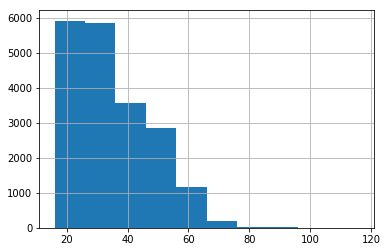

In [87]:
dallas.Age.hist(bins=10)

In [89]:
dallas.ArArrestDate.head()

0     6/1/2014
1     6/1/2014
2    6/10/2014
3    6/10/2014
4     7/8/2014
Name: ArArrestDate, dtype: object

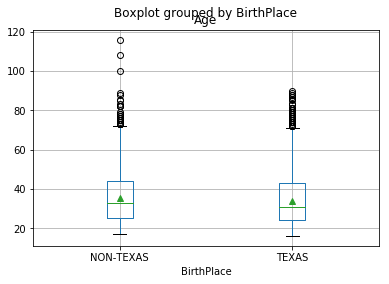

In [90]:
dallas.boxplot(column='Age', by='BirthPlace', showmeans=True)

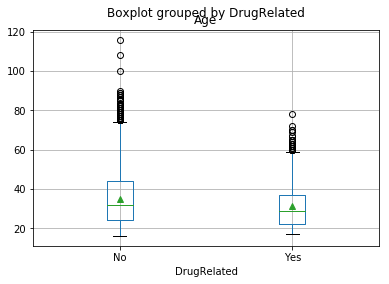

In [91]:
dallas.boxplot(column='Age', by='DrugRelated', showmeans=True)

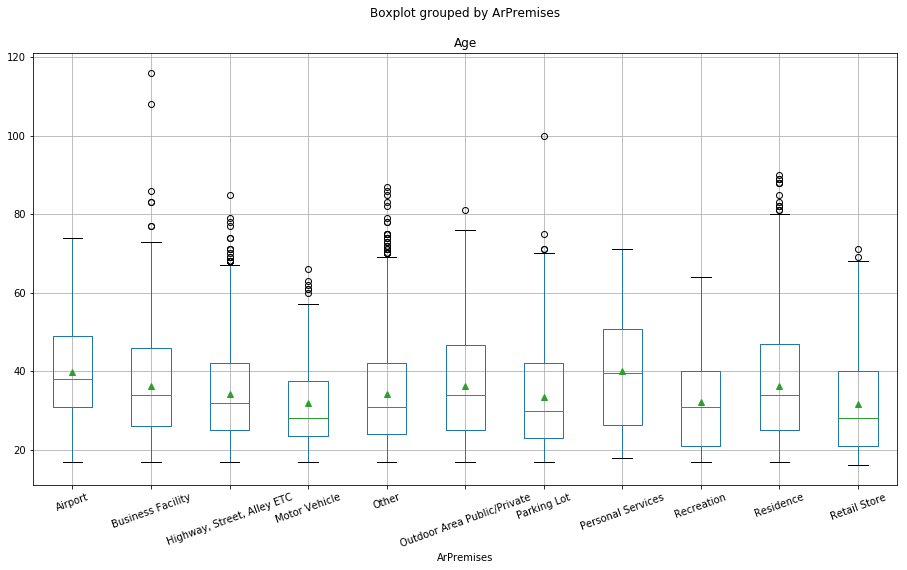

In [92]:
dallas.boxplot(column='Age', by='ArPremises', showmeans=True, figsize=(15, 8), rot=20)

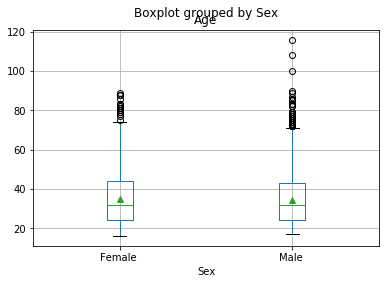

In [93]:
dallas.boxplot(column='Age', by='Sex', showmeans=True)

# GEO MAPPING

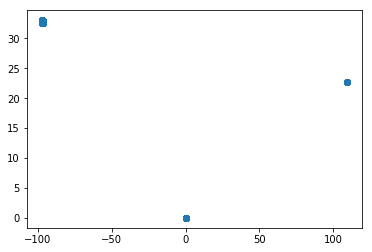

In [94]:
plt.scatter(dallas['longitude'], dallas['latitude'])

In [95]:
import mplleaflet

sample = dallas[dallas.longitude < 0].sample(1000)
plt.scatter(sample['longitude'], sample['latitude'])

mplleaflet.display()

Note, however, that rather than plotting every single point on our map we've taken a sample of 1000 of them and plotted those. This is known as undersampling. This is oftentime necessary, as here, for performance reasons. Because mplleaflet embeds point objects directly on an SVG canvas, it's as much as two orders of magnitude slower and more power-hungry than generating a really basic matplotlib blob.

There are few ways to get around this limitation. The bokeh library is classically mentioned as an option; the new, language-of-graphics-oriented (but still very incomplete) geoviews library does an even better job. And if you really, really need to see those points, you can use datashader, another not-even-a-year-old visualization library that comfortably works with millions of points (further reading).

However, in our case we'll do...none of these things. We're not really interested in individual arrests, per se; we're interested in grouping them and finding similarities and trends amongst them, not what exact street they're on. To do this, we'll wrap these points in polygons of some kind and try to  at neighborhoods.

#### Installing geopandas and its dependencies

~~~
conda install -c conda-forge geopandas
~~~


In [4]:
import sys
'geopandas' in sys.modules

False

In [2]:
import geopandas as gpd
import shapely as shp
import fiona
from shapely.geometry import mapping, shape

ModuleNotFoundError: No module named 'geopandas'

In [100]:
crs = None
geometry = [shp.geometry.Point(xy) for xy in zip(sample.longitude, sample.latitude)]
arrests = gpd.GeoDataFrame(sample, crs=crs, geometry=geometry)

NameError: name 'shp' is not defined

In [99]:
arrests['geometry'].head()

11133        POINT (-96.70190799999999 32.712321)
106      POINT (-96.83242593879999 32.7432286122)
9428                 POINT (-96.821933 32.674591)
16363        POINT (-96.8741372561 32.7507967918)
9704         POINT (-96.7963572653 32.7080075102)
Name: geometry, dtype: object

In [100]:
arrests.crs = fiona.crs.from_epsg(4326)
arrests = arrests.to_crs({'init': 'epsg:4326'})

The master directory for all well-known coordinate systems is the __EPSG__. The simple latitude-and-longitude reference system is epsg:4326, and geopandas makes it really, really easy to "fix" our coordinates by just calling the to_crs method:

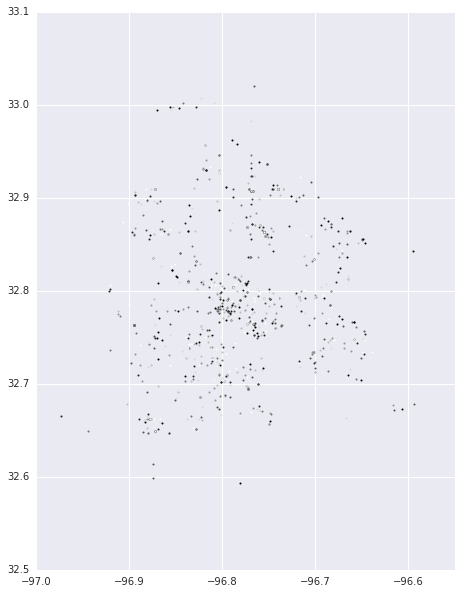

In [101]:
arrests.plot(figsize=(10, 10))

In [107]:
arrests = gpd.GeoDataFrame(arrests, geometry=arrests.apply(
        lambda srs: shapely.geometry.Point(srs['longitude'], srs['latitude']), axis='columns'
    ))

NameError: ("global name 'shapely' is not defined", u'occurred at index 11133')

In [103]:
import mplleaflet

f = plt.figure(figsize=(15, 8))
ax = f.gca()
arrests.plot(ax=ax)
mplleaflet.display(fig=f)

### Upconverting DataFrame to GeoDataFrame Objects

Under the hood, geopandas represents geometries using the shapely library. Just like how when using pandas you still occassionally have to reach across to grab something from numpy, when working with geometries it's important to understand what shapely nets you.

Luckily shapely has some of the best [documentation](http://toblerity.org/shapely/manual.html) and it's really simple to use.

Recall that our dallas listings was a DataFrame containing two geospatial fields, latitude and longitude. As a quick demonstration of shapely, let's upconvert this representation to true geometries. To do this we wrap our DataFrame in a GeoDataFrame, mapping our geometry column to a shapely Point for each coordinate pair.

### Plotting Geometries and Points

We've plotted our points and our polygons seperately, now how do we bring them together?

One obvious answer is to use a seaborn kdeplot, which many of you should be familiar with.

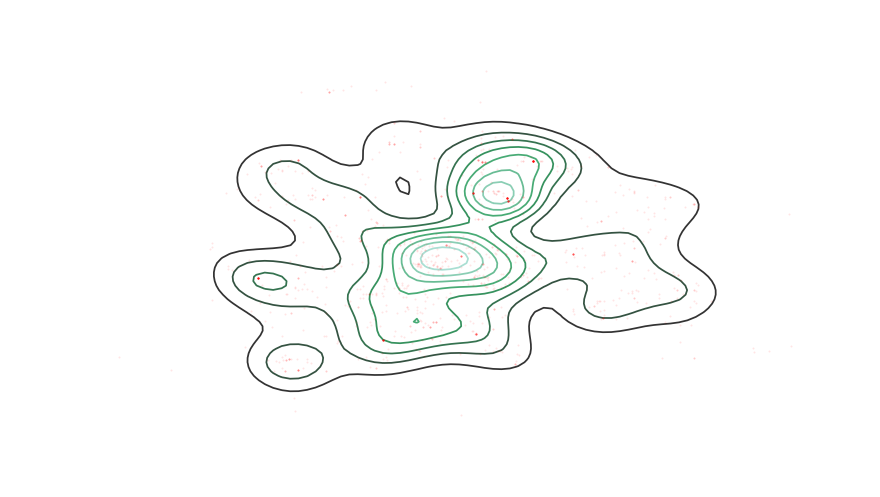

In [104]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()

arrests.plot(ax=ax, alpha=0.1, linewidth=0.25, color='red')
sns.kdeplot(data=arrests.apply(lambda srs: pd.Series({'x': srs.geometry.x, 'y': srs.geometry.y}), axis='columns'), ax=ax,
            alpha=1)
ax.set_axis_off()

## CLUSTERING

In [105]:
residence = arrests.query('ArPremises == "Residence"').groupby('Race').count()['ArrestNumID']
parking_lot = arrests.query('ArPremises == "Parking Lot (All Others)"').groupby('Race').count()['ArrestNumID']
business_facility = arrests.query('ArPremises == "Business Facility"').groupby('Race').count()['ArrestNumID']

arrests['ArRetailStore'] = arrests.Race.map(retail_store).fillna(0)
arrests['ArParkingLot'] = arrests.Race.map(parking_lot).fillna(0)
arrests['ArBusinessFacility'] = arrests.Race.map(parking_lot).fillna(0)

arrest_locations = arrests[['ArRetailStore', 'ArParkingLot', 'ArBusinessFacility']]

NameError: name 'retail_store' is not defined

In [106]:
import sklearn.cluster
import sklearn.preprocessing

clf = sklearn.cluster.KMeans(n_clusters=3)
X = sklearn.preprocessing.scale(arrest_locations.values)
classes = clf.fit(X)

f = plt.figure(figsize=(15, 8))
ax = f.gca()

# http://chrisalbon.com/python/set_the_color_of_a_matplotlib.html
kw = dict(column='cluster', k=3, cmap=plt.cm.winter, alpha=1, legend=True, linewidth=0.5, categorical=True)
arrests.assign(cluster=classes.labels_).plot(ax=ax, **kw)
ax.set_axis_off()

NameError: name 'arrest_locations' is not defined

In [ ]:
arrest_locations.assign(cluster=classes.labels_).groupby('cluster').mean()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(arrest_locations['ArRetailStore'], arrest_locations['ArParkingLot'],
           zs=arrest_locations['ArBusinessFacility'], c=classes.labels_, cmap=plt.cm.winter)

In [ ]:
arrests.columns

## EXPLORE WITH TIME

In [ ]:
arrests['ArArrestDateTime'] = pd.to_datetime(arrests['ArArrestDateTime'])

In [ ]:
dallas.set_index('ArArrestDateTime', inplace=True)

In [ ]:
dallas.columns

In [ ]:
year_2014 = dallas['2014'].groupby('DrugRelated')['ArrestNumID'].count()
year_2015 = dallas['2015'].groupby('DrugRelated')['ArrestNumID'].count()

In [ ]:
weekly14_summary = pd.DataFrame()
weekly14_summary['arrest_count'] = dallas['2014'].ArrestNumID.resample('W').count()

weekly15_summary = pd.DataFrame()
weekly15_summary['arrest_count'] = dallas['2015'].ArrestNumID.resample('W').count()


#Select only whole weeks
#weekly_summary = weekly_summary.truncate(before='2015-01-05', after='2015-12-27')
weekly15_summary.head()

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(weekly14_summary.index, weekly14_summary['arrest_count'], 'g-')
ax2.plot(weekly15_summary.index, weekly15_summary['arrest_count'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('2014', color='g')
ax2.set_ylabel('2015', color='b')


plt.show()
plt.rcParams['figure.figsize'] = 12, 15

In [ ]:
# Crimes at 4-5pm to Midnight are high
dallas["hour"] = dallas.index.hour

hourly14 = pd.DataFrame()
hourly14['arrest_count'] = dallas['2014'].groupby("hour")['ArrestNumID'].count()
                                          
hourly15 = pd.DataFrame()
hourly15['arrest_count'] = dallas['2015'].groupby("hour")['ArrestNumID'].count()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(hourly14.index, hourly14['arrest_count'], 'g-')
ax2.plot(hourly15.index, hourly15['arrest_count'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('2014', color='g')
ax2.set_ylabel('2015', color='b')


plt.show()
plt.rcParams['figure.figsize'] = 8, 5

## CARTO 

In [ ]:
url = "http://sankaraju.cartodb.com/api/v2/sql?"\
      "q=SELECT%20arpremises,to_char(ararrestdatetime,'yyyy-mm-DD%20HH24:MI:SS')%20AS%20time_plotly%20FROM%20dallas_arrests"\
      "&format=csv"
df = pd.read_csv(url)
#df = df.sort(['ararrestdatetime'], ascending=[0]);
df.head()

This just uses the CartoDB SQL API again, with the additional parameter filename that specifices the name of the datatable on import. By selecting the Torque in the [Visualization Wizard](http://docs.cartodb.com/cartodb-editor.html#wizards) you can get an animated map of the earthquakes over time. Make sure to select the time column in the wizard. By clicking on the CSS tab, you can customize your map further. Copy & Past the CartoCSS below the map to reproduce it's style.

In [ ]:
from IPython.display import HTML
HTML('<iframe width="100%" height="520" frameborder="0" src="https://sankaraju.carto.com/viz/643db7e2-ba80-11e6-a39b-0ecd1babdde5/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')